This writeup/code serves for the MATH-GA 2011 Monte Carlo Sampling Methods taught by Professor Jonathan Weare in Fall 2022 

# Part 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import scipy.stats as sps
import tqdm
from importlib import reload
import scipy

Write a subroutine that takes $N$ as an argument and generates a sample of the estimator $\bar{x}_N$ 

In [2]:
def average_x(N_num):
    X = np.random.exponential(scale=1.0,size=N_num)
    mean_es = np.mean(X)
    return mean_es

Generate many copies of $\bar{x}_N$ and produces a histogram of the values of $\sqrt{N}(\bar{x}_N-\pi[x])$

In [3]:
# expected value of x that sampled from exp(1)
exp_x = 1
num_sample = 1e5

def show_histogram(N,num_sample):
    num_sample = int(num_sample)
    X = np.zeros(num_sample)
    for i in range(num_sample):
        X[i] = np.sqrt(N)*(average_x(N)-exp_x)
    return X

Compute quantile fo data

In [4]:
def quantile(dd,q):
    qp = np.quantile(dd,q)
    return qp

# quantile points
q = [i*0.01 for i in range(0,101)]
# compute quantile from N(0,1)
mu = 0
sigma = 1
d1 = sps.norm(loc = mu, scale = sigma)
q_res1 = [d1.ppf(kk) for kk in q]

Plot the histogram and QQ-plot for different magnitude of $N$

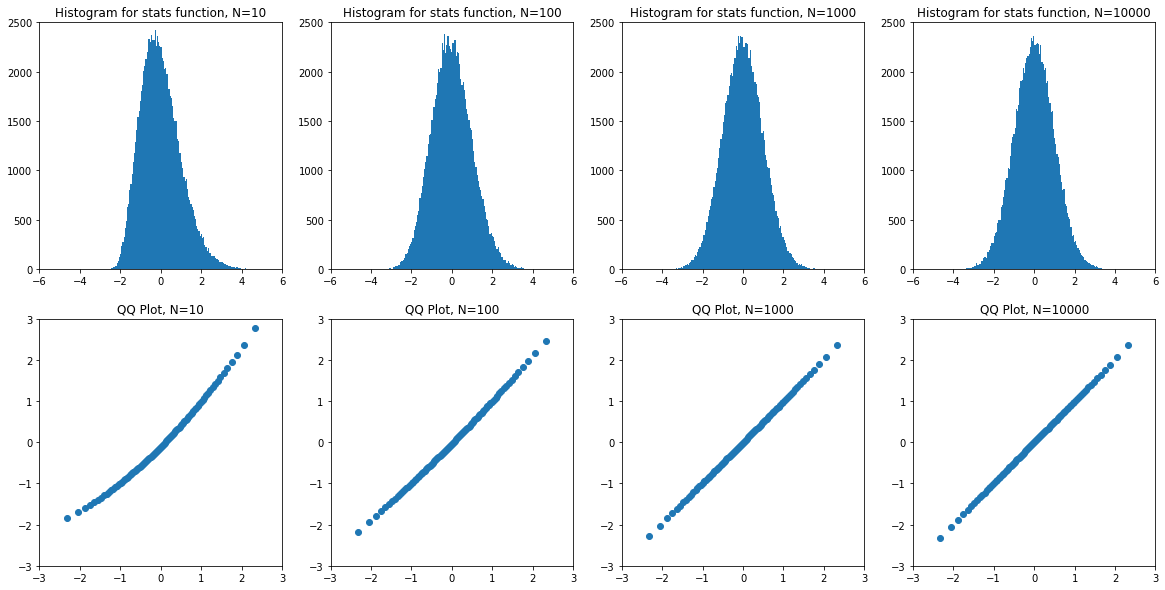

In [5]:
fig, axs = plt.subplots(2,4)
fig.set_size_inches(20,10)
for i in range(4):
    N = 10**(i+1)
    res = show_histogram(N,num_sample)
    axs[0][i].hist(res,bins='auto')
    axs[0][i].set_title(f'Histogram for stats function, N={N}')
    axs[0][i].set_xlim(-6,6)
    axs[0][i].set_ylim(0,2500)

    q_res2 = np.quantile(res,q)
    axs[1][i].scatter(q_res1,q_res2)
    axs[1][i].set_title(f'QQ Plot, N={N}')
    axs[1][i].set_xlim(-3,3)
    axs[1][i].set_ylim(-3,3)
    

Thus, we could tell that when $N$ goes larger, the distribution of $\sqrt{N}(\bar{x}_n - \pi[x])$ converges to normal distribution. 

# Part 2

Let $Y \sim \Gamma(N,\frac{1}{N})$, we could have $\bar{x}_N = \dfrac{1}{N}\sum_{i=1}^N X^{(i)} \sim \Gamma(N,\frac{1}{N})$, $X^{(i)}$ is from exponential distribution, $X^{(i)} \sim \exp(1)$. $p_N = \mathbb{P}[\bar{x}_N - \pi[x] > 0.1] = \mathbb{P}[\bar{x}_N > 1.1] = \mathbb{P}[Y > 1.1]$. $p_N = \mathbb{E}_Y [1_{1.1,\infty}]$. 

We could construct the estimator $Q_N$ as: 

\begin{equation}
    Q_N = \dfrac{1}{M} \sum_{i=1}^N 1_{\{Y^{(i)} > 1.1\}} = \dfrac{1}{M} \sum_{i=1}^N 1_{[1.1,\infty]} (Y^{(i)})
\end{equation}
where $Y^{(i)} \sim \Gamma(N,\dfrac{1}{N})$ are i.i.d. M is a fixed sample number.  

In [6]:
def Q_N(N,num_sample):
    data = np.random.gamma(N,1/N,num_sample)
    res = len(data[data>1.1])/num_sample
    return res

p_N = lambda N: 1-scipy.stats.gamma.cdf(1.1,a=N,scale=1/N)

# Q_N list
ll = 14
Nlst = [2**n for n in range(ll)]
Qlst = np.zeros(ll)
QRlst = np.zeros(ll)
num_sample = 10**8

for i in range(ll):
    N = Nlst[i]
    Qlst[i] = Q_N(N,num_sample)
    QRlst[i] = np.log(Qlst[i])/N

# p_N list
Plst = np.zeros(ll)
PRlst = np.zeros(ll)
for i in range(ll):
    N = Nlst[i]
    Plst[i] = p_N(N)
    PRlst[i] = np.log(Plst[i])/N

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log


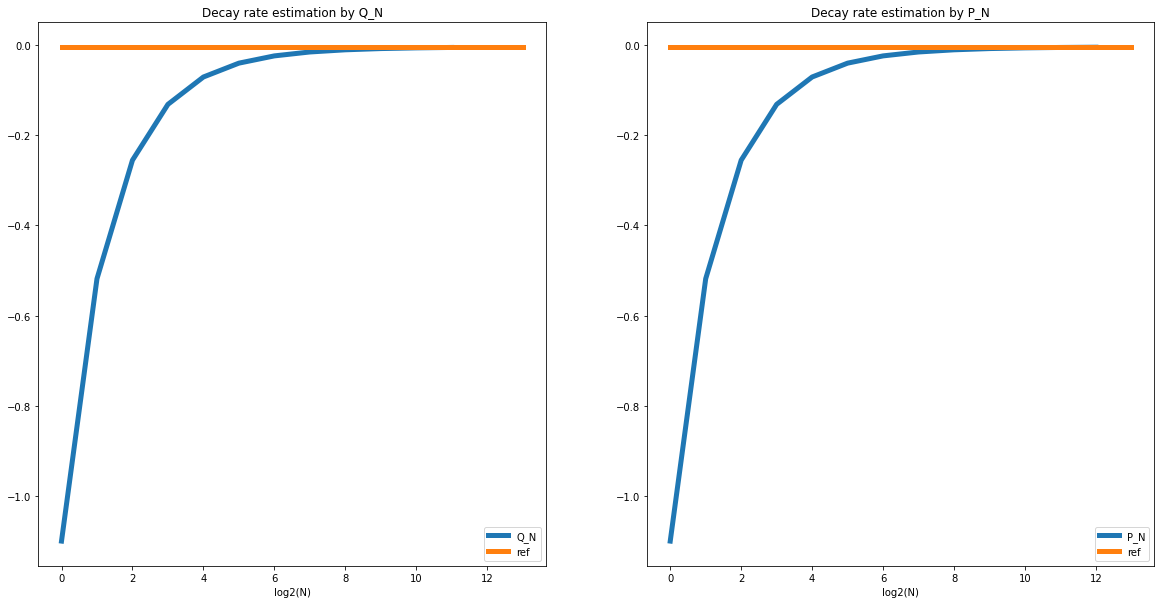

In [7]:
# plot the graph of decay rate comparison
standard_r = np.log(1.1)-0.1
xx = [i for i in range(ll)]
ref_r = [standard_r for i in range(ll)]

fig,axs = plt.subplots(1,2)
fig.set_size_inches(20,10)

axs[0].plot(xx,QRlst,label='Q_N',linewidth=5)
axs[0].plot(xx,ref_r,label='ref',linewidth=5)
axs[0].set_xlabel('log2(N)')
axs[0].set_title('Decay rate estimation by Q_N')
axs[0].legend()

axs[1].plot(xx,PRlst,label='P_N',linewidth=5)
axs[1].plot(xx,ref_r,label='ref',linewidth=5)
axs[1].set_xlabel('log2(N)')
axs[1].set_title('Decay rate estimation by P_N')
axs[1].legend()

plt.show()

We could also deduce that $Var[Q_N] = \dfrac{1}{M}(p_N - p_N^2)$, so $\sigma(Q_N) = \sqrt{\dfrac{p_N(1-p_N)}{M}}$. 

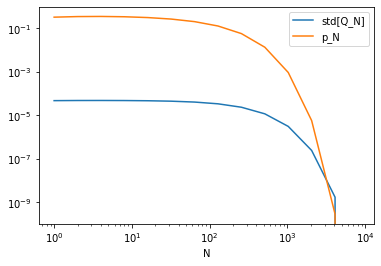

In [8]:
std_Q_N = lambda N: (1/num_sample*(p_N(N)-p_N(N)**2))**0.5

xx = [i for i in range(ll)]
Nlst = [2**i for i in range(ll)]
res1 = [std_Q_N(n) for n in Nlst]
res2 = [p_N(n) for n in Nlst]

plt.figure()
plt.plot(Nlst,res1,label='std[Q_N]')
plt.plot(Nlst,res2,label='p_N')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('N')
plt.show()